## HW_2


## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_imagesf,train_labelsf),(test_imagesf,test_labelsf)=fashion_mnist.load_data()

# Normalize the images.
train_imagesf = (train_imagesf / 127) - 1
test_imagesf = (test_imagesf / 127) - 1

# Flatten the images.
train_images = train_imagesf.reshape((-1, 784))
test_images = test_imagesf.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [3]:
ind=np.where(train_labelsf==3)[0]
ind

array([    3,    20,    25, ..., 59971, 59980, 59997], dtype=int64)

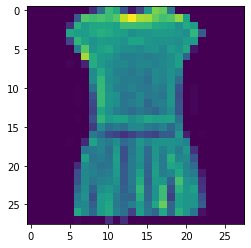

In [4]:
#plt.gray()
plt.imshow(train_imagesf[3,:,:])
plt.show()

In [5]:
model1 = Sequential(name='my_model')
model1.add( Dense(   128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
for k in range(2):
  model1.add(Dense(  10+(10-k)*10, activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

In [6]:
model1.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 

In [7]:
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


In [8]:
y_t = to_categorical( train_labelsf)
y_tt = to_categorical(test_labelsf)

In [9]:

# Train the model.
hh = model1.fit(    
  train_images,
  y_t,
  epochs=15,
  batch_size=256, 
  validation_split=0.2
)

# Evaluate the model.
model1.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labelsf[:5]) # [7, 2, 1, 0, 4]

Epoch 1/15
188/188 [==============================] - 1s 5ms/step - loss: 0.5582 - accuracy: 0.8049 - val_loss: 0.4335 - val_accuracy: 0.8429
Epoch 2/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3835 - accuracy: 0.8599 - val_loss: 0.3862 - val_accuracy: 0.8629
Epoch 3/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8732 - val_loss: 0.3540 - val_accuracy: 0.8701
Epoch 4/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3171 - accuracy: 0.8844 - val_loss: 0.3568 - val_accuracy: 0.8670
Epoch 5/15
188/188 [==============================] - 1s 4ms/step - loss: 0.3020 - accuracy: 0.8882 - val_loss: 0.3397 - val_accuracy: 0.8737
Epoch 6/15
188/188 [==============================] - 1s 4ms/step - loss: 0.2793 - accuracy: 0.8969 - val_loss: 0.3380 - val_accuracy: 0.8792
Epoch 7/15
188/188 [==============================] - 1s 4ms/step - loss: 0.2670 - accuracy: 0.9021 - val_loss: 0.3217 - val_accuracy: 0.8841
Epoch 

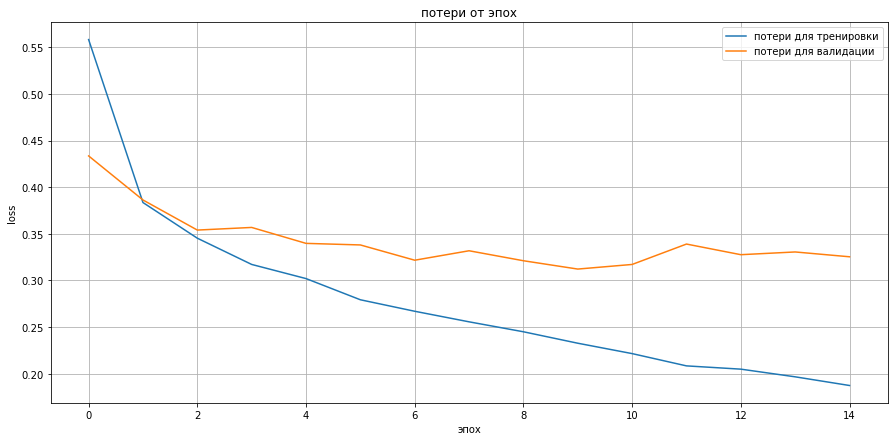

In [10]:
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()


## Оценим влияние количества нейронов в 2-х слойной сети

In [11]:
models = []

In [12]:
%%time

for i in [10, 50, 100, 200, 300, 500, 1000, 2000]:
    model = Sequential(name=f'relu{i}')
    model.add(Dense(i, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))
    model.compile(
          optimizer='adam', # оптимизатор
          loss=keras.losses.CategoricalCrossentropy(), # функция потерь
          metrics=['accuracy'], # метрика
    )
    # Train the model.
    hh = model.fit(    
        train_images,
        y_t,
        epochs=100000,
        batch_size=256, 
        validation_split=0.2,
        callbacks=[keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        min_delta=0.00001,
                        patience=3,
                        verbose=0,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=True,)
                  ],
        verbose=0
    )
    train_metrics = model.evaluate(train_images, y_t)
    test_metrics = model.evaluate(test_images, y_tt)
    models.append({
        'group': 0,
        'name': model.name,
        'model': model,
        'hystory': hh,
        'n_layers': 2,
        'n_neurons': i,
        'optimizer': 'adam',
        'train_loss': train_metrics[0],
        'test_loss': test_metrics[0],
        'train_accuracy': train_metrics[1],
        'test_accuracy': test_metrics[1],
    })
    print()

313/313 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8440

313/313 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8708

313/313 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8754

313/313 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8826

313/313 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8797

313/313 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8814

313/313 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8837

313/313 [==============================] - 1s 4ms/step - loss: 0.3461 - accuracy: 0.8830

Wall time: 3min 17s


In [13]:
pd.DataFrame(models).drop(['model', 'hystory'],axis=1)

,group,name,n_layers,n_neurons,optimizer,train_loss,test_loss,train_accuracy,test_accuracy
0,0,relu10,2,10,adam,0.379344,0.442508,0.867500,0.8440
1,0,relu50,2,50,adam,0.270953,0.363001,0.902617,0.8708
2,0,relu100,2,100,adam,0.239864,0.349173,0.914617,0.8754
3,0,relu200,2,200,adam,0.224442,0.341353,0.920250,0.8826
4,0,relu300,2,300,adam,0.240445,0.344120,0.913650,0.8797
5,0,relu500,2,500,adam,0.238210,0.339001,0.914317,0.8814
6,0,relu1000,2,1000,adam,0.210902,0.342158,0.923833,0.8837
7,0,relu2000,2,2000,adam,0.213551,0.346140,0.924417,0.8830


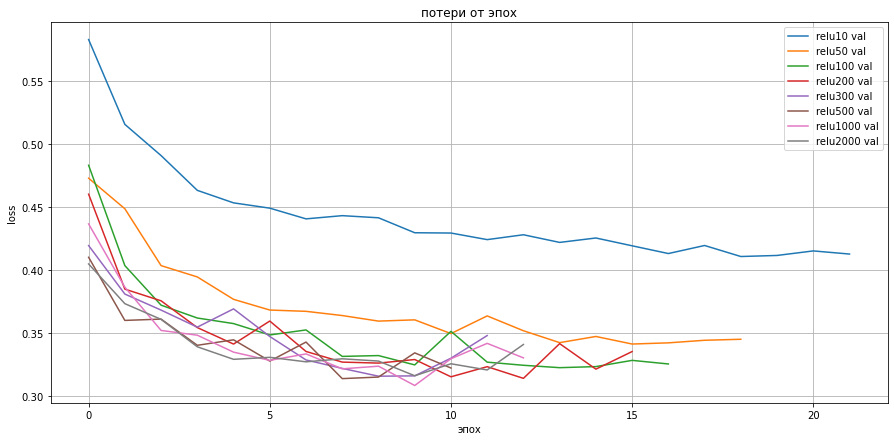

In [14]:
plt.figure(figsize=(15,7))
for model in models:
    hh = model['hystory']
#     plt.plot(hh.history['loss'], label = f'{model["name"]} train')
    plt.plot(hh.history['val_loss'], label = f'{model["name"]} val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

Очевидно, что для данного случая при выбранном наборе гиперпараметров 10 и 50 нейронов не достаточно. Всё, что выше имеет место быть, но с учетом ресурсов для вычислений

## Оценим влияние количества слоёв

Выбираем модели с 200ми нейронами на каждом слое (скорее всего это плохой выбор, но быстрый)

In [15]:
%%time

n_neurons = 200
for n_layers in [2, 3, 5, 10]:
    model = Sequential(name=f'relu_{n_neurons}x{n_layers-1}')
    model.add(Dense(n_neurons, activation='relu', input_shape=(784,)))
    for i in range(n_layers-2):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(
          optimizer='adam', # оптимизатор
          loss=keras.losses.CategoricalCrossentropy(), # функция потерь
          metrics=['accuracy'], # метрика
    )
    # Train the model.
    hh = model.fit(    
        train_images,
        y_t,
        epochs=100000,
        batch_size=256, 
        validation_split=0.2,
        callbacks=[keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        min_delta=0.00001,
                        patience=3,
                        verbose=0,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=True,)
                  ],
        verbose=0
    )
    train_metrics = model.evaluate(train_images, y_t)
    test_metrics = model.evaluate(test_images, y_tt)
    models.append({
        'group': 1,
        'name': model.name,
        'model': model,
        'hystory': hh,
        'n_layers': n_layers,
        'n_neurons': n_neurons,
        'optimizer': 'adam',
        'train_loss': train_metrics[0],
        'test_loss': test_metrics[0],
        'train_accuracy': train_metrics[1],
        'test_accuracy': test_metrics[1],
    })
    print()

313/313 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8792

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8790

313/313 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8765

313/313 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8781

Wall time: 1min 12s


In [16]:
pd.DataFrame(models).loc[pd.DataFrame(models)['group'] == 1].drop(['model', 'hystory'],axis=1)

,group,name,n_layers,n_neurons,optimizer,train_loss,test_loss,train_accuracy,test_accuracy
8,1,relu_200x1,2,200,adam,0.232471,0.342378,0.915783,0.8792
9,1,relu_200x2,3,200,adam,0.231968,0.344219,0.913533,0.8790
10,1,relu_200x4,5,200,adam,0.261572,0.345747,0.904033,0.8765
11,1,relu_200x9,10,200,adam,0.246756,0.351194,0.909667,0.8781


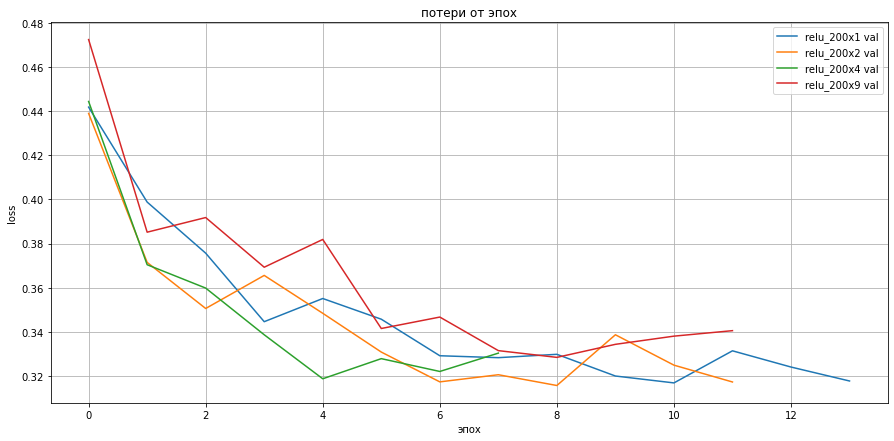

In [17]:
plt.figure(figsize=(15,7))
for model in models:
    if model['group'] == 1:
        hh = model['hystory']
    #     plt.plot(hh.history['loss'], label = f'{model["name"]} train')
        plt.plot(hh.history['val_loss'], label = f'{model["name"]} val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

Видим, что и 1 внутренний слой с таким количеством нейронов справляется, но с двумя сеть обучается немного быстрее (по количеству эпох)

## Оценим влияние оптимизаторов

Выбираем 3-слойную сеть

In [18]:
%%time

n_neurons = 200
n_layers = 3
for optimizer in ['SGD', 'RMSprop', 'Adam', 'Adagrad']:
    model = Sequential(name=f'relu_{n_neurons}x{n_layers-1}_{optimizer}')
    model.add(Dense(n_neurons, activation='relu', input_shape=(784,)))
    for i in range(n_layers-2):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(
          optimizer=optimizer, # оптимизатор
          loss=keras.losses.CategoricalCrossentropy(), # функция потерь
          metrics=['accuracy'], # метрика
    )
    # Train the model.
    hh = model.fit(    
        train_images,
        y_t,
        epochs=100000,
        batch_size=256, 
        validation_split=0.2,
        callbacks=[keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        min_delta=0.00001,
                        patience=3,
                        verbose=0,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=True,)
                  ],
        verbose=0
    )
    train_metrics = model.evaluate(train_images, y_t)
    test_metrics = model.evaluate(test_images, y_tt)
    models.append({
        'group': 2,
        'name': model.name,
        'model': model,
        'hystory': hh,
        'n_layers': n_layers,
        'n_neurons': n_neurons,
        'optimizer': optimizer,
        'train_loss': train_metrics[0],
        'test_loss': test_metrics[0],
        'train_accuracy': train_metrics[1],
        'test_accuracy': test_metrics[1],
    })
    print()

313/313 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.8645

313/313 [==============================] - 1s 2ms/step - loss: 0.3711 - accuracy: 0.8679

313/313 [==============================] - 1s 2ms/step - loss: 0.3423 - accuracy: 0.8785

313/313 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8721

Wall time: 5min 26s


In [19]:
pd.DataFrame(models).loc[pd.DataFrame(models)['group'] == 2].drop(['model', 'hystory'],axis=1)

,group,name,n_layers,n_neurons,optimizer,train_loss,test_loss,train_accuracy,test_accuracy
12,2,relu_200x2_SGD,3,200,SGD,0.318202,0.379655,0.887300,0.8645
13,2,relu_200x2_RMSprop,3,200,RMSprop,0.300952,0.371057,0.888883,0.8679
14,2,relu_200x2_Adam,3,200,Adam,0.240012,0.342313,0.913000,0.8785
15,2,relu_200x2_Adagrad,3,200,Adagrad,0.291980,0.362289,0.897250,0.8721


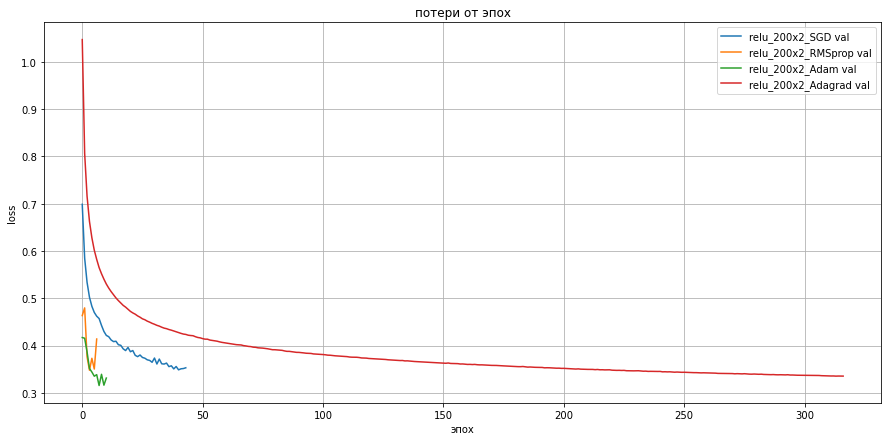

In [20]:
plt.figure(figsize=(15,7))
for model in models:
    if model['group'] == 2:
        hh = model['hystory']
    #     plt.plot(hh.history['loss'], label = f'{model["name"]} train')
        plt.plot(hh.history['val_loss'], label = f'{model["name"]} val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

Adam оказался лучшим вариантом для данного случая

## Оценим полноту и точность каждого класса одной из сетей

In [21]:
model = pd.DataFrame(models).iloc[14]['model']

In [22]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [23]:
test_labelsf

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
cm = pd.DataFrame(confusion_matrix(test_labelsf, y_pred))
cm

,0,1,2,3,4,5,6,7,8,9
0,852,3,22,20,3,1,93,0,6,0
1,1,980,1,12,3,0,3,0,0,0
2,16,3,830,13,70,1,64,0,3,0
3,29,31,15,867,32,0,22,0,4,0
4,2,3,112,22,815,0,45,0,1,0
5,0,0,0,1,0,956,0,20,0,23
6,142,2,90,27,74,0,654,0,11,0
7,1,0,0,0,0,36,0,916,0,47
8,7,0,4,9,1,9,14,6,949,1
9,1,0,0,0,0,6,0,27,0,966


Похоже, что некоторые классы довольно трудно распознаются этой сетью

In [25]:
for i in range(10):
    precision = cm[i][i] / sum(cm.iloc[i])
    recall = cm[i][i] / sum(cm[i])
    print(f'{i}: precision = {precision},\t recall = {recall}')

0: precision = 0.852,	 recall = 0.8106565176022835
1: precision = 0.98,	 recall = 0.958904109589041
2: precision = 0.83,	 recall = 0.7728119180633147
3: precision = 0.867,	 recall = 0.8928939237899073
4: precision = 0.815,	 recall = 0.8166332665330661
5: precision = 0.956,	 recall = 0.9474727452923687
6: precision = 0.654,	 recall = 0.7307262569832402
7: precision = 0.916,	 recall = 0.9453044375644994
8: precision = 0.949,	 recall = 0.9743326488706365
9: precision = 0.966,	 recall = 0.9315332690453231


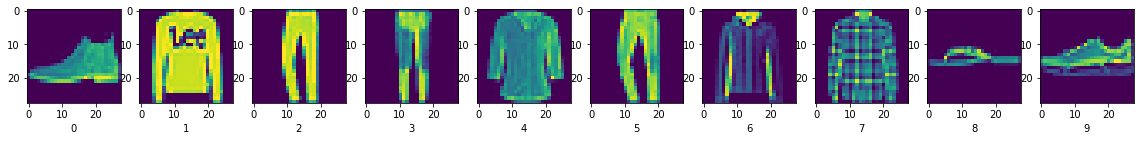

In [26]:
plt.figure(figsize =(40,10))
for i in range(10):
    for j in range(len(test_images)):
        if test_labelsf[j] == i:
            plt.subplot(1,20,i+1)
            plt.imshow(test_images[i,:].reshape(28,28))
            plt.xlabel(str(i))
            break

Очень странно, что класс курток (6) для этой сети так сложно отличить от класса ботинок (0), при том, что с рубашками (7) ни разу не перепутал. Видимо параметры нужно лучше подбирать, но, к сожалению, я уже затянул со сдачей этого ДЗ